# Face verification with VGGFace2 model

In [46]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

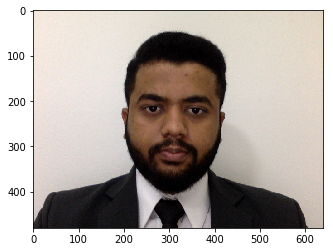

In [47]:
# load image of the Authorized User
image = pyplot.imread('OG.jpg')

# plot the extracted face
pyplot.imshow(image)
# show the plot
pyplot.show()

In [48]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

In [49]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
	# extract faces
	faces = [extract_face(f) for f in filenames]
	# convert into an array of samples
	samples = asarray(faces, 'float32')
	# prepare the face for the model
	samples = preprocess_input(samples, version=2)
	# create a vggface model
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	# perform prediction
	yhat = model.predict(samples)
	return yhat

In [50]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('=> Access Granted - Authorized User - face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('=> Access Denied - Unauthorized User - face is NOT a Match (%.3f > %.3f)' % (score, thresh))


## Testing ( Authorized User )

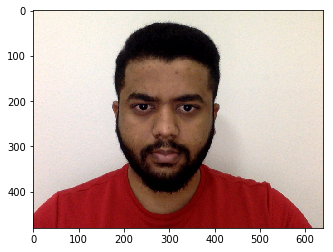

In [51]:
# load image of the Authorized User to test
image = pyplot.imread('me.jpg')

# plot the extracted face
pyplot.imshow(image)
# show the plot
pyplot.show()

In [52]:
# define filenames
filenames = ['OG.jpg', 'me.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define photo id
me_id = embeddings[0]
# verify photos
is_match(embeddings[0], embeddings[1])

=> Access Granted - Authorized User - face is a Match (0.036 <= 0.500)


## Testing ( Unauthorized User )

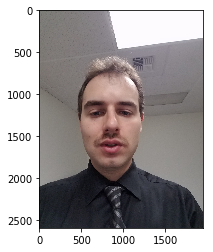

In [53]:
# load image of the Unauthorized User
image_not = pyplot.imread('not_me.jpg')

# plot the extracted face
pyplot.imshow(image_not)
# show the plot
pyplot.show()

In [54]:
# define filenames
filenames = ['OG.jpg', 'not_me.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define photo id
not_me_id = embeddings[0]
# verify photos
is_match(embeddings[0], embeddings[1])

=> Access Denied - Unauthorized User - face is NOT a Match (0.774 > 0.500)
